# Gaussiane a 2 dimensioni


Il modo più semplice per ottenere una PDF per due variabili è fare il prodotto di due PDF, una per ciascuna variabile. L'esempio più semplice è con due Gaussiane, che assumiamo per semplicità abbiamo valor medio nullo:

$\displaystyle g_{xy}(x, y) = g_x(x) g_y(y) = \frac{1}{2\pi\sigma_x\sigma_y}\exp\left[-\left(\frac{x^2}{2\sigma_x^2}+\frac{y^2}{2\sigma^2_y}\right)\right]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
sx, sy = 2, 1
def g2d(x, y):
    return norm.pdf(x, scale=sx)*norm.pdf(y, scale=sy)
x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
z = g2d(x, y)

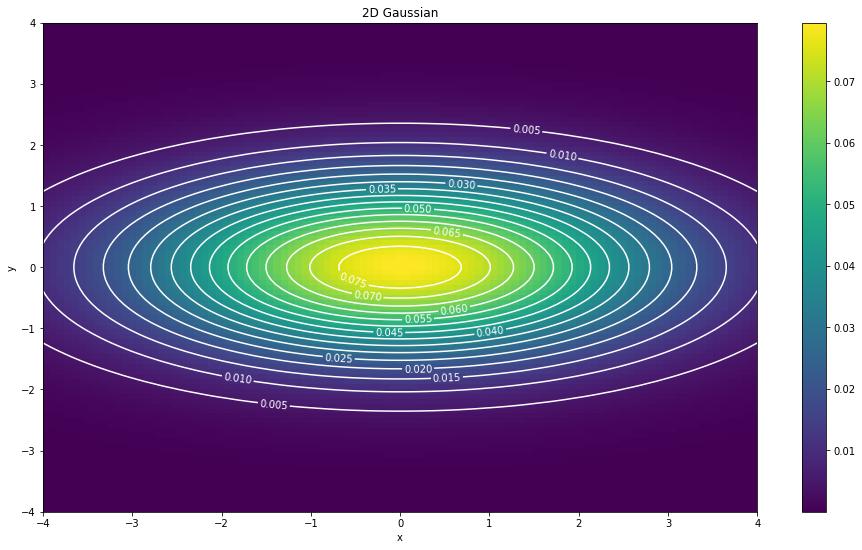

In [3]:
figure, ax = plt.subplots(figsize=(16,9))
col = ax.pcolormesh(x, y, z, cmap='viridis', vmin=z.min(), vmax=z.max())
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.005), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

Applichiamo una matrice di rotazione:

$\displaystyle R = \left(\begin{array}{cc}\cos\phi & -\sin\phi \\ \sin\phi & \cos\phi\end{array}\right)$

$\displaystyle \left(\begin{array}{c}x^\prime\\y^\prime\end{array}\right) = 
R
\left(\begin{array}{c}x\\y\end{array}\right) = 
\left(\begin{array}{c}x^\prime\\y^\prime\end{array}\right) = 
\left(\begin{array}{cc}\cos\phi & -\sin\phi \\ \sin\phi & \cos\phi\end{array}\right)
\left(\begin{array}{c}x\\y\end{array}\right) =
\left(\begin{array}{c}x\cos\phi -y\sin\phi\\x\sin\phi +y\cos\phi\end{array}\right)
$ 

In realtà, noi applicheremo la matrice *inversa* perché vogliamo passare da $(x^\prime, y^\prime)$ a $(x, y)$.
Basterà quindi cambiare segno a $\phi$.

In [4]:
import math
phi = -math.pi/6
s, c = math.sin(phi), math.cos(phi)
rot = np.array([[c, -s], [s, c]])

In [5]:
rot

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [6]:
v = [0.9, 0.1]
np.matmul(rot,v)

array([ 0.82942286, -0.36339746])

In [7]:
def g2dr(x, y):
    return g2d(*np.matmul(rot,[x, y]))

In [8]:
z = (np.vectorize(g2dr))(x, y)

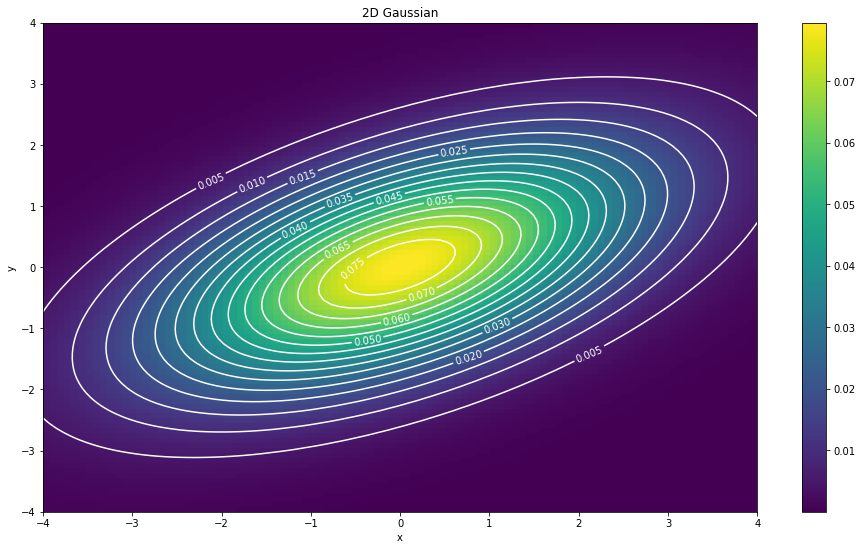

In [9]:
figure, ax = plt.subplots(figsize=(16,9))
col = ax.pcolormesh(x, y, z, cmap='viridis', vmin=z.min(), vmax=z.max())
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.005), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

## Da variabili indipendenti a variabili correlate
La matematica per passare dalle coordinate $(x^\prime, y^\prime)$ nelle quali la distribuzione si fattorizza nel 
prodotto di due gaussiane ($x^\prime$ e $y^\prime$ sono variabili indipendenti) ad $(x,y)$ è un po' tediosa.

Nel seguito i passaggi salienti.

La PDF in termini di $x^\prime$ e $y^\prime$ è:

$\displaystyle g_{x^\prime y^\prime}(x^\prime, y^\prime) = g_{x^\prime}(x^\prime) g_{y^\prime}(y^\prime) = \frac{1}{2\pi\sigma_{x^\prime}\sigma_{y^\prime}} \exp\left[-(x^{\prime 2}/2\sigma_{x^\prime}^2+y^{\prime 2}/2\sigma^2_{y^\prime})\right]$

La trasformazione di coordinate è data dalla seguente rotazione:

$\begin{cases}
\ x'=x\cos\phi-y\sin\phi\\
\ y'=x\sin\phi+y\cos\phi
\end{cases}$

La PDF trasformata si ottiene tenendo conto che il determinante jacobiano è unitario: $\mathrm{det}|\partial x^\prime_i/\partial x_j|=1$. La rotazione, infatti, conserva le aree.

La PDF trasformata deve essere della seguente forma:

$\displaystyle g_{xy}(x,\
y)=\frac{1}{2\pi\,|C|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(x,\,y)\,C^{-1}\,\left(\begin{array}{l}
x\\
y
\end{array}\right)\right]\ 
$

Uguagliando gli argomenti dell'esponenziale si ottiene la seguente equazione:

$\displaystyle\frac{x^{\prime 2}}{\sigma_{x'}^{2}}+\frac{y^{\prime
2}}{\sigma_{y'}^{2}}= (x,\,y)\,C^{-1}\ \left(\begin{array}{l}
x\\
y
\end{array}\right)$

Esplicitando la trasforlazione di coordinate, si può dimostrare che la matrice $C^{-1}$ è:

$  C^{-1}=\left(\begin{array}{l@{\quad}l}\displaystyle\frac{\cos^{2}\phi}{\sigma^2_{x'}}
+ \frac{\sin^{2}\phi}{\sigma^2_{y'}} & \displaystyle\sin\phi\cos\phi
\left(\frac{1}{\sigma_{y^{\prime}}^2} - \frac{1}{\sigma^2_{x'}}\right)\\
\displaystyle\sin\phi\cos\phi\left(\frac{1}{\sigma_{y^{\prime}}^2} -
\frac{1}{\sigma^2_{x'}}\right) & \displaystyle\frac{\sin^2\phi}{\sigma^2_{x'}} +
\frac{\cos^2\phi}{\sigma^2_{y'}}\end{array}\right)$

La matrice di covarianza deve avere la seguente forma:

$C= \left(\begin{array}{l@{\quad}l}
\sigma_{x}^{2} & \rho_{xy}\,\sigma_{x}\sigma_{y}\\
\rho_{xy}\,\sigma_{x}\sigma_{y} & \sigma_{y}^{2}\end{array}\right)$

Questo permette di ottenere il valore del determinante al denominatore della PDF:

$\displaystyle\left|C^{-1}\right|=\frac{1}{\sigma_{x'}^{2}\sigma_{y'}^{2}}=\frac{1}{\sigma_{x}^{2}\sigma_{y}^{2}\left(1-\rho_{xy}^{2}\right)}$

L'inversione di $C^{-1}$ dà:

$C=\left(\begin{array}{ll}
\cos^{2}\phi\,\sigma_{x'}^{2}+\sin^{2}\phi\,\sigma_{y'}^{2} &\ \sin\phi\cos\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)\\
\sin\phi\cos\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)&\ \sin^{2}\phi\,\sigma_{x'}^{2}+\cos^{2}\phi\,\sigma_{y'}^{2}
\end{array}\right)$

Da $C$ si possono ottenere i diversi termini:

$\begin{align}
\sigma_{x}^{2}&= \cos^{2}\phi\,\sigma_{x'}^{2} +\sin^{2}\phi\,\sigma_{y'}^{2}\ , \label{ch02:eqn2.90} \\
\sigma_{y}^{2}&=\sin^{2}\phi\,\sigma_{x'}^{2} +\cos^{2}\phi\,\sigma_{y'}^{2}\ , \label{ch02:eqn2.91} \\
\rho_{xy}&=\frac{\mathrm{cov}(x,y)}{\sigma_{x}\sigma_{y}}=\frac{\sin
2\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{\sqrt{\sin
2\phi\,\left(\sigma_{x'}^{4}+\sigma_{y'}^{4}\right)+2\,\sigma_{x'}^{2}\sigma_{y'}^{2}}}\ .
\end{align}
$

In particolare, l'angolo di rotazione $\phi$ soddisfa questa relazione:

$\displaystyle\tan2\phi=\frac{2\,\rho_{xy}\,\sigma_{x}\sigma_{y}}{\sigma_{y}^{2}-\sigma_{x}^{2}}$

Finalmente, la PDF trasformata si può scrivere:

$\displaystyle\boxed{g_{xy}(x,\,y) = \frac{1}{2\pi\,\sigma_x\sigma_y\sqrt{1 -
\rho^2_{xy}}}\exp \left[-\frac{1}{2(1 - \rho^2_{xy})}
\left(\frac{x^2}{\sigma^2_x} + \frac{y^2}{\sigma^2_y} -
\frac{2x\,y\,\rho_{xy}}{\sigma_x\sigma_y}\right)\right]}$

# Contorni a $1\sigma$, $2\sigma$, $n\sigma$

La curva che corrisponde all'argomento dell'esponenziale pari ad 1 è una curva equiprobabile:

$\displaystyle\frac{x^{2}}{\sigma_{x}^{2}}+\frac{y^{2}}{\sigma_{y}^{2}}-\frac{2x\,y\,\rho_{xy}}{\sigma_{x}\sigma_{y}}=1$

Esistono relazioni tra le deviazioni standard di $x$, $y$, $x^\prime$ e $y^\prime$ che possono essere sintetizzate nella figura seguente:

<img style="width: 500px" src="img/gauss_2d.png">

Similmente si possono definire i contorni a $2\sigma$:

$\displaystyle\frac{x^{2}}{\sigma_{x}^{2}}+\frac{y^{2}}{\sigma_{y}^{2}}-\frac{2x\,y\,\rho_{xy}}{\sigma_{x}\sigma_{y}}=2^2 = 4\ .
$

Le PDF marginali si possono calcolare integrando $g_{xy}(x,y)$, e si ottengono gaussiane ad una dimensione:

$\begin{align}
g_{x}(x)&=\int_{-\infty}^{+\infty}\!\!\! g_{xy}(x,\,y)\
\mathrm{d}y=\frac{1}{\sqrt{2\pi\,\sigma_{x}^{2}}}\,e^{-{x^{2}}/{2\sigma_{x}^{2}}}
\\
g_{y}(y)&=\int_{-\infty}^{+\infty}\!\!\! g_{xy}(x,\,y)\
\mathrm{d}x=\frac{1}{\sqrt{2\pi\,\sigma_{y}^{2}}}\,e^{-{y^2}/{2\sigma_{y}^{2}}}
\end{align}
$

<img style="width: 600px" src="img/gauss_2d_contours.png">


Nella documentazione di ```matplotlib``` viene spiegato <a href="https://matplotlib.org/3.1.1/gallery/units/ellipse_with_units.html">come disegnare un ellisse</a>. Questo viene applicato su 
 <a href="https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py">come disegnare un contorno di confidenza</a>, ma lo vedremo successivamente. 

# Numeri casuali secondo una Gaussiana con correlazione

In [10]:
from scipy.stats import norm
from matplotlib import patches

In [11]:
sigma_x1, sigma_y1 = 1, 3
x1 = norm.rvs(scale=sigma_x1, size=10000)
y1 = norm.rvs(scale=sigma_y1, size=10000)
phi_deg = 30
phi = phi_deg/180*math.pi
s, c = math.sin(phi), math.cos(phi)
x = c*x1 - s*y1
y = s*x1 + c*y1

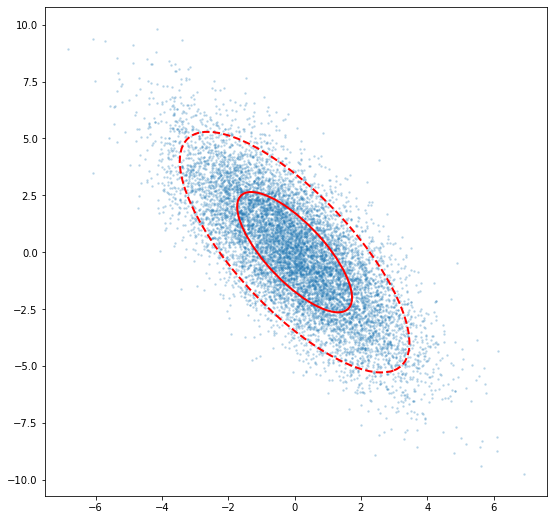

In [16]:
fig = plt.figure(figsize=(9,9))
plt.scatter(x,y, marker='.', s=10, alpha=0.2)
ax = plt.gca()
e1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=phi_deg, linewidth=2, color='r', fill=False, zorder=3)
e2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=phi_deg, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax.add_patch(e1)
ax.add_patch(e2)

## Disegnamo le proiezioni nelle due dimensioni

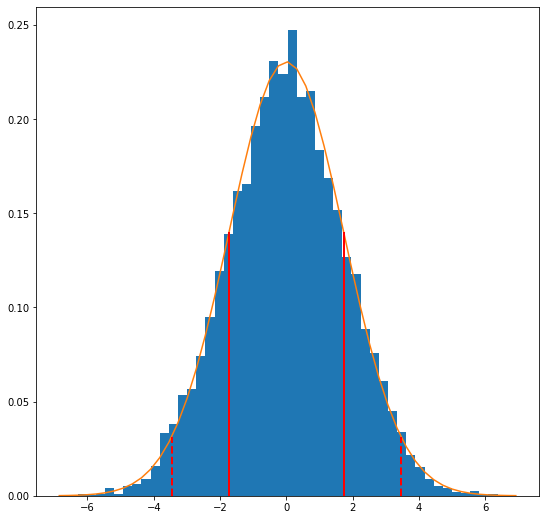

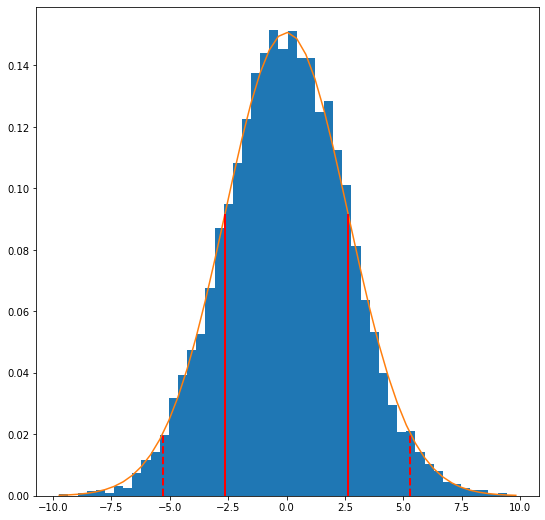

In [13]:
sigma_x = math.sqrt((c*sigma_x1)**2+(s*sigma_y1)**2)
sigma_y = math.sqrt((s*sigma_x1)**2+(c*sigma_y1)**2)
fig = plt.figure(figsize=(9,9))
n, bins, p = plt.hist(x,50, density=True)
plt.plot(bins, norm.pdf(bins,scale=sigma_x))
plt.plot([sigma_x, sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
plt.plot([-sigma_x, -sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
plt.plot([2*sigma_x, 2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle="--")
plt.plot([-2*sigma_x, -2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle="--")
fig.show()
fig = plt.figure(figsize=(9,9))
n, bins, p = plt.hist(y,50, density=True)
plt.plot(bins, norm.pdf(bins,scale=sigma_y))
plt.plot([sigma_y, sigma_y], [0, norm.pdf(sigma_y,scale=sigma_y)], color='r',linewidth=2)
plt.plot([-sigma_y, -sigma_y], [0, norm.pdf(sigma_y,scale=sigma_y)], color='r',linewidth=2)
plt.plot([2*sigma_y, 2*sigma_y], [0, norm.pdf(2*sigma_y,scale=sigma_y)], color='r',linewidth=2, linestyle="--")
plt.plot([-2*sigma_y, -2*sigma_y], [0, norm.pdf(2*sigma_y,scale=sigma_y)], color='r',linewidth=2, linestyle="--")
fig.show()

# Disegnamo le proiezioni allineate con i due assi

Consultare per dettagli la <a href="https://matplotlib.org/stable/tutorials/intermediate/gridspec.html">documentazione su ```GridSpec```</a>.

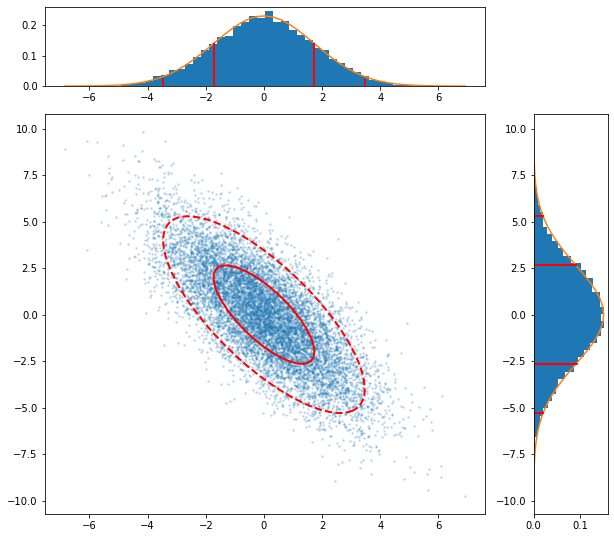

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])
ax0.scatter(x,y, marker='.', s=10, alpha=0.2)
ee1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=phi_deg, linewidth=2, color='r', fill=False, zorder=3)
ee2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=phi_deg, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax0.add_patch(ee1)
ax0.add_patch(ee2)
nx, binsx, px = axx.hist(x,50, density=True)
axx.plot(binsx, norm.pdf(binsx,scale=sigma_x))
axx.plot([sigma_x, sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
axx.plot([-sigma_x, -sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
axx.plot([2*sigma_x, 2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle='--')
axx.plot([-2*sigma_x, -2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle='--')
ny, binsy, py = axy.hist(y,50, density=True, orientation='horizontal')
axy.plot(norm.pdf(binsy,scale=sigma_y), binsy)
axy.plot([0, norm.pdf(sigma_y,scale=sigma_y)], [sigma_y, sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(sigma_y,scale=sigma_y)], [-sigma_y, -sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(2*sigma_y,scale=sigma_y)], [2*sigma_y, 2*sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(2*sigma_y,scale=sigma_y)], [-2*sigma_y, -2*sigma_y], color='r',linewidth=2)

fig.tight_layout()


# Generalizzazione a $N$ dimensioni

la generalizzazione ad $N$ dimensioni è la seguente:

$\displaystyle g(x_i,\cdots,x_N) = \frac{1}{(2\pi)^{N/2}\left|C\right|^{-1/2}}\exp\left[
-\frac{1}{2}(x_i-\mu_i)\,C_{ij}^{-1}\,(x_j-\mu_j)
\right]$

dove $C$ è la matrice di correlazione $N\times N$:

$C_{ij} = \mathbb{C}\mathrm{ov}(x_i, x_j)$

# Spunti per esercizi
* generare coppie di numeri distribuiti in maniera gaussiana con la matrice di covarianza voluta usando [```multivariate_normal```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) e verificare numericamente che la matrice sia quella voluta.
* calcolare la probabilità corrispondente ad un ellissiode di ampiezza $1\sigma$, $2\sigma$, $3\sigma$.